In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
# from scipy import stats
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
data = pd.read_csv('./cardio_train.csv',sep=";")
df = pd.DataFrame(data)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.drop(columns=['id'],inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
# check if the dataset has null or missing value
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
# remove egregious (i.e. impossible) systolic and diastolic blood pressure values

from scipy import stats

threshold = 3

ap_hi_outliers = df[df['ap_hi'] > 250]
df = df.drop(ap_hi_outliers.index)

ap_lo_outliers = df[df['ap_lo'] > 150]
df = df.drop(ap_lo_outliers.index)

In [6]:
# add bmi feature
bmi = df['weight'].div(df['height'].multiply(df['height'])) * 100
df['bmi'] = bmi

In [7]:
# make normalized dataframe
df_normalized = df.copy()
for var in ['age', 'height', 'weight', 'ap_hi', 'ap_lo']:
  print(var + " mean, avg: " + str(df[var].mean()) + ", " + str(df[var].std()))
  df_normalized[var] = df[var] - df[var].mean()
  df_normalized[var] = df_normalized[var].div(df[var].std())

df_normalized

age mean, avg: 19463.59660795825, 2468.38480682597
height mean, avg: 164.3598898311227, 8.204045411568867
weight mean, avg: 74.11611944625642, 14.328253541828976
ap_hi mean, avg: 126.29723853011524, 17.861674927889364
ap_lo mean, avg: 81.30319634703196, 9.761402032165053


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,-0.433724,2,0.443697,-0.845610,-0.912414,-0.133505,1,1,0,0,1,0,0.219671
1,0.309678,1,-1.018996,0.759610,0.767160,0.890938,3,1,0,0,1,1,0.349277
2,-0.245746,1,0.078024,-0.706026,0.207302,-1.157948,3,1,0,0,0,1,0.235078
3,-0.745668,2,0.565588,0.550233,1.327018,1.915381,1,1,0,0,1,1,0.287105
4,-0.806032,1,-1.018996,-1.264363,-1.472272,-2.182391,1,1,0,0,0,0,0.230112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.090584,2,0.443697,0.131480,-0.352556,-0.133505,1,1,1,0,1,0,0.269274
69996,1.271035,1,-0.775214,3.621089,0.767160,0.890938,2,2,0,0,1,1,0.504727
69997,-0.161076,2,2.272063,2.155453,3.006592,0.890938,3,1,0,1,0,1,0.313536
69998,1.202164,1,-0.165758,-0.147689,0.487231,-0.133505,1,2,0,0,0,1,0.270993


In [13]:
def accuracy_metrics(y, predictions):
    """A function to return False Positive and False Negative Rate"""
    pos = 0
    neg = 0
    truePos = 0
    trueNeg = 0
    falsePos = 0
    falseNeg = 0

    for i in range(len(y)):
        if predictions[i] == 1:
            if y[i] == 1:
                pos += 1
                truePos += 1
            else:
                neg += 1
                falsePos += 1
        else:
            if y[i] == 1:
                pos += 1
                falseNeg += 1
            else:
                neg += 1
                trueNeg += 1

    return (truePos / pos, trueNeg / neg, falsePos / neg, falseNeg / pos)

In [87]:
X = df_normalized.drop(columns = ["cardio"])
Y = df_normalized["cardio"].values
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=1,stratify=Y)

In [88]:
# K-NN - data setup

from sklearn.neighbors import KNeighborsClassifier

neighbors = range(5, 240, 10)
knn_scores = [0] * len(neighbors)
knn_false_pos = [0] * len(neighbors)
knn_false_neg = [0] * len(neighbors)

# knn_X = df_normalized.drop(columns=['cardio', 'height', 'weight', 'gender', 'alco', 'gluc', 'active', 'smoke'])
# knn_y = df_normalized['cardio'].values

#knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_X, knn_y, test_size=0.2, random_state=1, stratify=knn_y)
#knn_X

knn_X_train = X_train.drop(columns=['height', 'weight', 'gender', 'alco', 'gluc', 'active', 'smoke'])
knn_X_test = X_test.drop(columns=['height', 'weight', 'gender', 'alco', 'gluc', 'active', 'smoke'])
knn_Y_train = Y_train
knn_Y_test = Y_test


In [89]:
# train K-NN model - this block should take 1 or 2 minutes

for i in range(len(neighbors)):
  knn = KNeighborsClassifier(n_neighbors = neighbors[i])
  
  knn.fit(knn_X_train, knn_Y_train)
  knn_scores[i] = knn.score(knn_X_test, knn_Y_test)

  # precision is percent of correct positive classifications (higher precision => fewer false positives)
  # knn_false_pos[i], knn_false_neg[i], temp = det_curve(knn_y_test, knn.predict(knn_X_test))
  temp, temp, knn_false_pos[i], knn_false_neg[i] = accuracy_metrics(knn_Y_test, knn.predict(knn_X_test))

  # CODE FOR K-FOLD CV (takes too long to run):
  # score = cross_val_score(knn, knn_X, knn_y, cv=folds)
  # scores[i] = np.mean(score)

bestK = knn_scores.index(max(knn_scores))
print(f'Best-performing k value: {neighbors[bestK]}, accuracy: {knn_scores[bestK]}, FPR: {knn_false_pos[bestK]}, FNR: {knn_false_neg[bestK]}')

knnBestFalsePos = knn_false_pos.index(min(knn_false_pos))
print(f'K value with best false positive rate (FPR)): {neighbors[knnBestFalsePos]}, FPR: {knn_false_pos[knnBestFalsePos]}')

knnBestFalseNeg = knn_false_neg.index(min(knn_false_neg))
print(f'K value with best false negative rate (FNR): {neighbors[knnBestFalseNeg]}, FNR: {knn_false_neg[knnBestFalseNeg]}')

Best-performing k value: 165, accuracy: 0.7279843444227005, FPR: 0.21603787118060536, FNR: 0.3291825373571638
K value with best false positive rate (FPR)): 205, FPR: 0.21259503658011764
K value with best false negative rate (FNR): 15, FNR: 0.3180486375622619


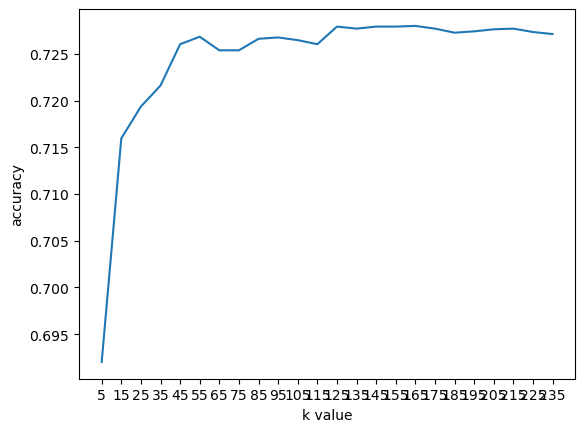

In [16]:
# K-NN accuracy plot

plt.xlabel('k value')
plt.ylabel('accuracy')
plt.plot(knn_scores, label='accuracy')
plt.xticks(range(len(neighbors)), neighbors)
plt.show()

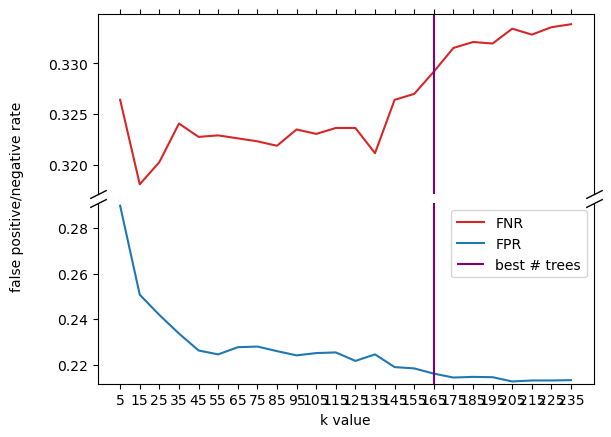

In [17]:
# K-NN false positive/negative plot

'''
READ: commented code below plots data on top of each other w/ separate y axes 
   run this commented code instead if the uncommented code results in a weird-looking graph
'''
# fig, ax1 = plt.subplots()

# color = 'tab:blue'
# ax1.set_ylabel('false positive rate', color=color)
# ax1.set_xlabel('k value')
# ax1.plot(knn_false_pos, label='FPR', color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()

# color = 'tab:red'
# ax2.set_ylabel('false negative rate', color=color)
# ax2.plot(knn_false_neg, label='FNR', color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# plt.xticks(range(len(neighbors)), neighbors)
# plt.show()


'''
broken axis code from https://matplotlib.org/stable/gallery/subplots_axes_and_figures/broken_axis.html
'''

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

ax1.plot(knn_false_neg, label='FNR', color='tab:red')
ax2.plot(knn_false_pos, label='FPR', color='tab:blue')

ax2.set_xlabel('k value')
ax2.set_ylabel('false positive/negative rate')
ax2.yaxis.set_label_coords(0.01, 0.5, transform=fig.transFigure)

ax1.set_ylim(min(knn_false_neg) - .001, max(knn_false_neg) + .001)
ax2.set_ylim(min(knn_false_pos) - .001, max(knn_false_pos) + .001)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)

ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# axis break
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.vlines(x=bestK, ymin=0, ymax=1, colors='purple')
ax2.vlines(x=bestK, ymin=0, ymax=1, colors='purple', label='best # trees')

# makes joint legend for two axes: from https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=1)

plt.xticks(range(len(neighbors)), neighbors)
plt.show()

In [90]:
# SMALL K-NN model - training a KNN on just 2 features: systolic and diastolic blood pressure

neighbors_2d = range(5, 240, 10)
knn_2d = [0] * len(neighbors_2d)
knn_2d_scores = [0] * len(neighbors_2d)
knn_2d_false_pos = [0] * len(neighbors_2d)
knn_2d_false_neg = [0] * len(neighbors_2d)

# knn_2d_X = df_normalized.drop(columns=['cardio', 'height', 'weight', 'gender', 'alco', 'gluc', 'active', 'smoke', 'age', 'bmi', 'cholesterol'])
# knn_y = df_normalized['cardio'].values

# knn_2d_X_train, knn_2d_X_test, knn_y_train, knn_y_test = train_test_split(knn_2d_X, knn_y, test_size=0.2, random_state=1, stratify=knn_y)
# knn_2d_X

knn_2d_X_train = X_train.drop(columns=['height', 'weight', 'gender', 'alco', 'gluc', 'active', 'smoke', 'age', 'bmi', 'cholesterol'])
knn_2d_X_test = X_test.drop(columns=['height', 'weight', 'gender', 'alco', 'gluc', 'active', 'smoke', 'age', 'bmi', 'cholesterol'])
knn_2d_Y_train = Y_train
knn_2d_Y_test = Y_test

In [91]:
for i in range(len(neighbors_2d)):
  knn_2d[i] = KNeighborsClassifier(n_neighbors = neighbors_2d[i])
  
  knn_2d[i].fit(knn_2d_X_train, knn_Y_train)
  knn_2d_scores[i] = knn_2d[i].score(knn_2d_X_test, knn_Y_test)

  temp, temp, knn_2d_false_pos[i], knn_2d_false_neg[i] = accuracy_metrics(knn_Y_test, knn_2d[i].predict(knn_2d_X_test))

bestK_2d = knn_2d_scores.index(max(knn_2d_scores))
print(f'Best-performing k value: {neighbors_2d[bestK_2d]}, accuracy: {knn_2d_scores[bestK_2d]}, FPR: {knn_2d_false_pos[bestK_2d]}, FNR: {knn_2d_false_neg[bestK_2d]}')

knnBestFalsePos_2d = knn_2d_false_pos.index(min(knn_2d_false_pos))
print(f'K value with best false positive rate (FPR)): {neighbors_2d[knnBestFalsePos_2d]}, FPR: {knn_2d_false_pos[knnBestFalsePos_2d]}')

knnBestFalseNeg_2d = knn_2d_false_neg.index(min(knn_2d_false_neg))
print(f'K value with best false negative rate (FNR): {neighbors_2d[knnBestFalseNeg_2d]}, FNR: {knn_2d_false_neg[knnBestFalseNeg_2d]}')

Best-performing k value: 65, accuracy: 0.7097195042400521, FPR: 0.18964280591019939, FNR: 0.3930559624963375
K value with best false positive rate (FPR)): 185, FPR: 0.18275713670922392
K value with best false negative rate (FNR): 5, FNR: 0.09976560210958102


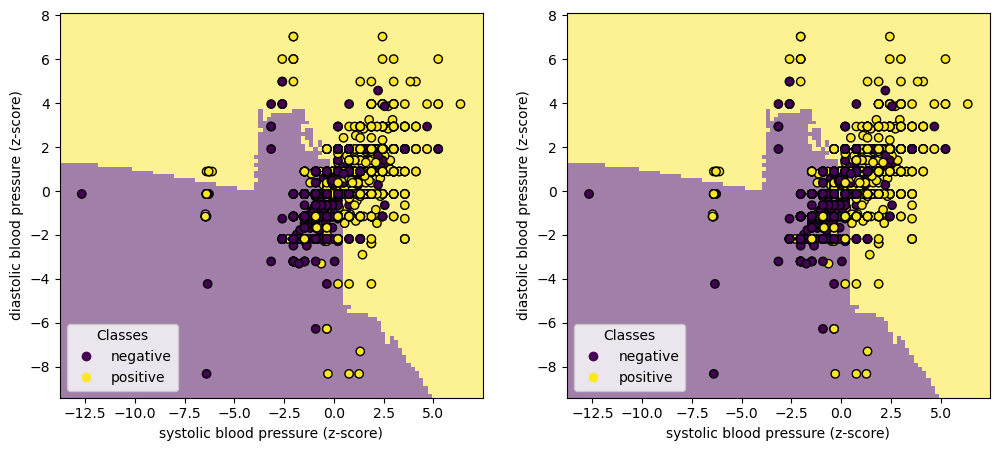

In [92]:
from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax in axs:
    disp = DecisionBoundaryDisplay.from_estimator(
        knn_2d[bestK_2d],
        knn_2d_X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel='systolic blood pressure (z-score)',
        ylabel='diastolic blood pressure (z-score)',
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(knn_2d_X_test.iloc[:, 0], knn_2d_X_test.iloc[:, 1], c=knn_Y_test, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        ['negative', 'positive'],
        loc="lower left",
        title="Classes",
    )

plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier


# interesting to see how Random Forest handles continuous variables

# can test different max_depth= values

trees = range(60, 151, 10)
rf_scores = [0] * len(trees)
rf_false_pos = [0] * len(trees)
rf_false_neg = [0] * len(trees)

rf_X = df_normalized.drop(columns=['cardio'])
rf_y = df_normalized['cardio'].values

rf = [None] * len(trees)

# rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X, rf_y, test_size=0.2, random_state=1, stratify=knn_y)

In [93]:
# train random forest models, find best tree depth - this code block may take a couple minutes

for i in range(len(trees)):
  rf[i] = RandomForestClassifier(n_estimators=trees[i])
  
  rf[i].fit(X_train, Y_train)
  rf_scores[i] = rf[i].score(X_test, Y_test)

  temp, temp, rf_false_pos[i], rf_false_neg[i] = accuracy_metrics(Y_test, rf[i].predict(X_test))

  # CODE FOR K-FOLD CV (takes too long to run):
  # score = cross_val_score(rf, rf_X, rf_y, cv=folds)
  # scores[i] = np.mean(score)

bestTreeNum = rf_scores.index(max(rf_scores))
print(f'Best-performing # trees: {trees[bestTreeNum]}, accuracy: {rf_scores[bestTreeNum]}, FPR: {rf_false_pos[bestTreeNum]}, FNR: {rf_false_neg[bestTreeNum]}')

rfBestFalsePos = rf_false_pos.index(min(rf_false_pos))
print(f'Tree num with best false positive rate (FPR): {trees[rfBestFalsePos]}, FPR: {rf_false_pos[rfBestFalsePos]}')

rfBestFalseNeg = rf_false_neg.index(min(rf_false_neg))
print(f'Tree num with best false negative rate (FNR): {trees[rfBestFalseNeg]}, FNR: {rf_false_neg[rfBestFalseNeg]}')

Best-performing # trees: 150, accuracy: 0.7130535623686308, FPR: 0.26739348730454743, FNR: 0.3069147377673601
Tree num with best false positive rate (FPR): 70, FPR: 0.26739348730454743
Tree num with best false negative rate (FNR): 120, FNR: 0.30574274831526516


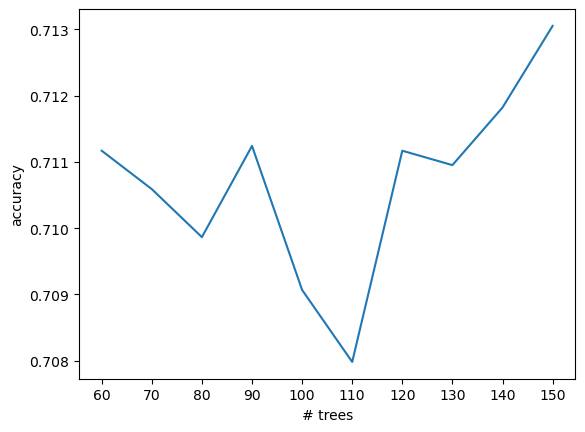

In [94]:
plt.xlabel('# trees')
plt.ylabel('accuracy')
plt.plot(rf_scores)
plt.xticks(range(len(trees)), trees)
plt.show()

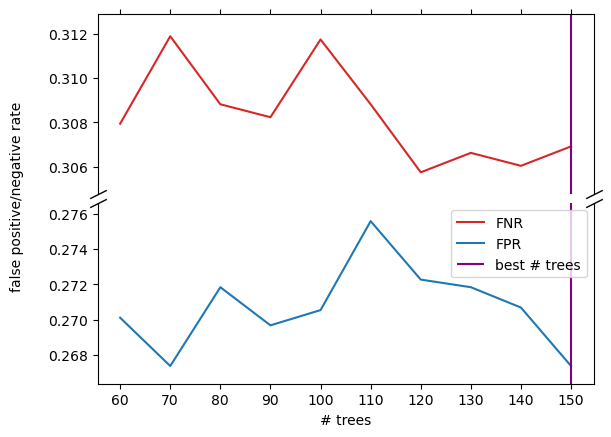

In [95]:
# Random Forest false positive/negative plot

'''
READ: commented code below plots data on top of each other w/ separate y axes 
   run this commented code instead if the uncommented code results in a weird-looking graph
'''

# fig, ax1 = plt.subplots()

# color = 'tab:blue'
# ax1.set_ylabel('false positive rate', color=color)
# ax1.set_xlabel('# trees')
# ax1.plot(rf_false_pos, label='FPR', color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()

# color = 'tab:red'
# ax2.set_ylabel('false negative rate', color=color)
# ax2.plot(rf_false_neg, label='FNR', color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# plt.xticks(range(len(trees)), trees)
# plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

ax1.plot(rf_false_neg, label='FNR', color='tab:red')
ax2.plot(rf_false_pos, label='FPR', color='tab:blue')

ax2.set_xlabel('# trees')
ax2.set_ylabel('false positive/negative rate')
ax2.yaxis.set_label_coords(0.01, 0.5, transform=fig.transFigure)

ax1.set_ylim(min(rf_false_neg) - .001, max(rf_false_neg) + .001)
ax2.set_ylim(min(rf_false_pos) - .001, max(rf_false_pos) + .001)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)

ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# axis break
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.vlines(x=bestTreeNum, ymin=0, ymax=1, colors='purple')
ax2.vlines(x=bestTreeNum, ymin=0, ymax=1, colors='purple', label='best # trees')

# makes joint legend for two axes: from https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.xticks(range(len(trees)), trees)
plt.show()

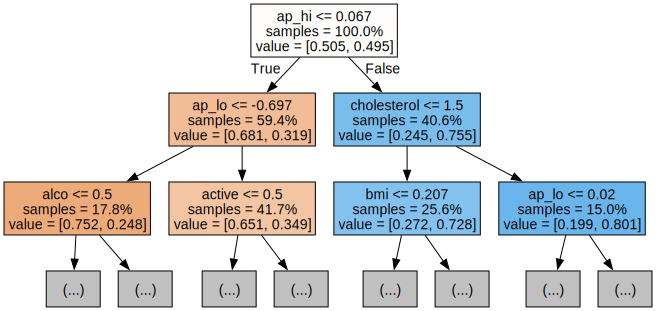

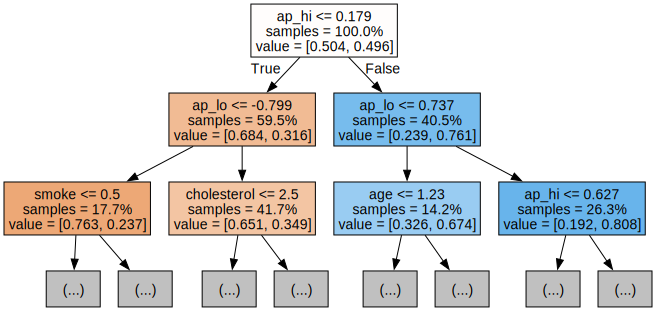

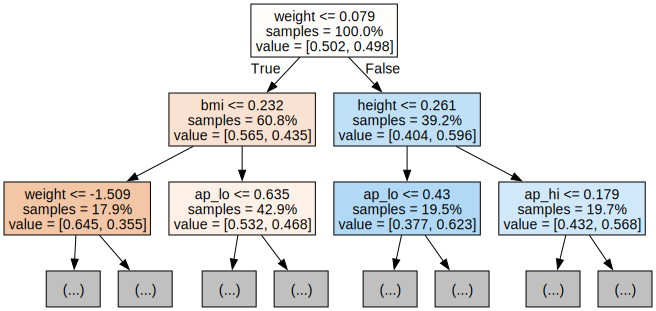

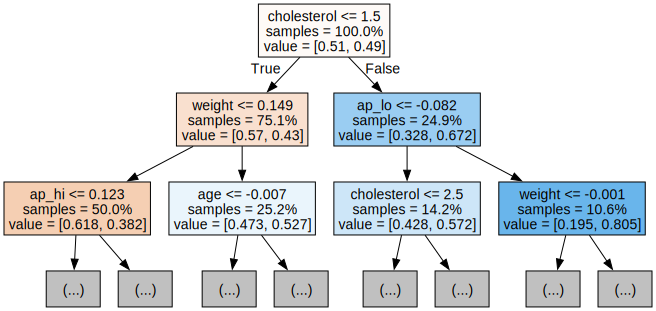

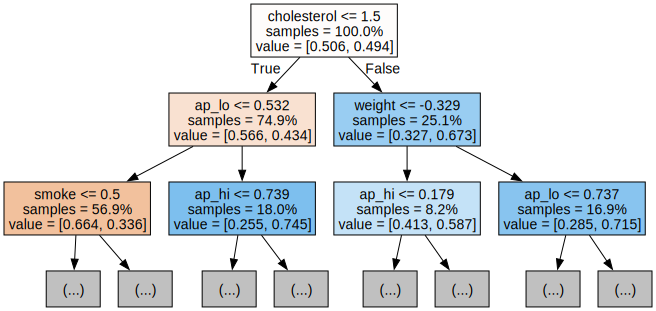

In [96]:
# tree visualization code from https://www.datacamp.com/tutorial/random-forests-classifier-python

from sklearn.tree import export_graphviz
import graphviz

for i in range(5):
  tree = rf[bestTreeNum].estimators_[i]
  dot_data = export_graphviz(tree,
                             feature_names=X_train.columns,
                             filled=True,
                             max_depth=2,
                             impurity=False,
                             proportion=True)
  graph = graphviz.Source(dot_data)
  display(graph)

In [97]:
# Gaussian Naive Bayes 
# Gaussian NB can handle continuous variables, represent probability of a variable
#   based on normal distribution

from sklearn.naive_bayes import GaussianNB

# which hyperparameters to tune??

# maybe try training on a small subset of data, like 500 or 1000 books
#   if works well, application is that could be useful for training geographically localized NB 
#   models, so hospitals in regions with limited data can still build strong prediction models 
#   that are specific to that region

# try testing for false positives vs. false negatives (if false pos account for most of inaccurate
#   predictions, that is probably better than having lots of false negatives?)
#   - or could just give us more insight if we have both false positive and false negative data

var_smoothing_vals = np.logspace(-9, 0, num=100) # range(100, 125, 4)
nb_scores = [0] * len(var_smoothing_vals)
nb_false_pos = [0] * len(var_smoothing_vals)
nb_false_neg = [0] * len(var_smoothing_vals)

# nb_X = df.drop(columns=['cardio'])
# nb_y = df['cardio'].values

nb = [None] * len(var_smoothing_vals)

# nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(nb_X, nb_y, test_size=0.9982, random_state=1, stratify=nb_y)

In [98]:
# train Gaussian Naive Bayes models - this block should take only a few seconds

for i in range(len(var_smoothing_vals)):
  nb[i] = GaussianNB(var_smoothing=var_smoothing_vals[i])
  
  nb[i].fit(nb_X_train, nb_y_train)
  nb_scores[i] = nb[i].score(nb_X_test, nb_y_test)

  # precision is percent of correct positive classifications (higher precision => fewer false positives)
  # nb_false_pos[i], nb_false_neg[i], temp = det_curve(nb_y_test, nb.predict(nb_X_test))
  temp, temp, nb_false_pos[i], nb_false_neg[i] = accuracy_metrics(nb_y_test, nb[i].predict(nb_X_test))

  # CODE FOR K-FOLD CV (takes too long to run):
  # score = cross_val_score(nb, nb_X, nb_y, cv=folds)
  # scores[i] = np.mean(score)

bestVarSmoothing = nb_scores.index(max(nb_scores))
print(f'Best-performing var smoothing val: {var_smoothing_vals[bestVarSmoothing]}, accuracy: {nb_scores[bestVarSmoothing]}, FPR: {nb_false_pos[bestVarSmoothing]}, FNR: {nb_false_neg[bestVarSmoothing]}')

nbBestFalsePos = nb_false_pos.index(min(nb_false_pos))
print(f'Var smoothing value with lowest false positive rate (FPR): {var_smoothing_vals[nbBestFalsePos]}, FPR: {nb_false_pos[nbBestFalsePos]}')

nbBestFalseNeg = nb_false_neg.index(min(nb_false_neg))
print(f'Var smoothing value with lowest false negative rate (FNR): {var_smoothing_vals[nbBestFalseNeg]}, FNR: {nb_false_neg[nbBestFalseNeg]}')

Best-performing var smoothing val: 1e-07, accuracy: 0.7029668462555002, FPR: 0.1920899083096203, FNR: 0.40419724097446436
Var smoothing value with lowest false positive rate (FPR): 1.8738174228603868e-07, FPR: 0.18924434480181657
Var smoothing value with lowest false negative rate (FNR): 0.0005336699231206312, FNR: 0.3444085705899618


<function matplotlib.pyplot.show(close=None, block=None)>

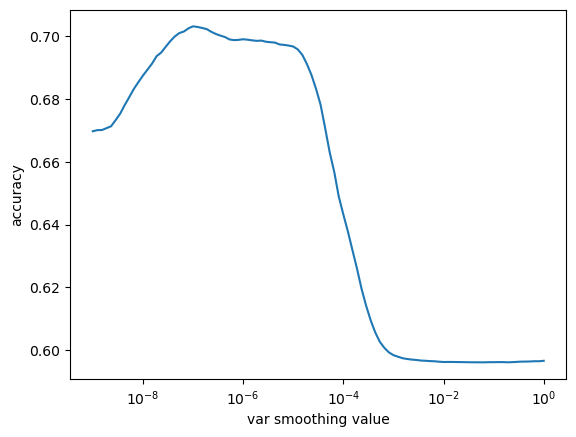

In [99]:
# plot NB accuracy

fig, ax = plt.subplots(1,1)
ax.set_xscale('log')
ax.set_xlabel('var smoothing value')
ax.set_ylabel('accuracy')
ax.plot(var_smoothing_vals, nb_scores)
plt.show

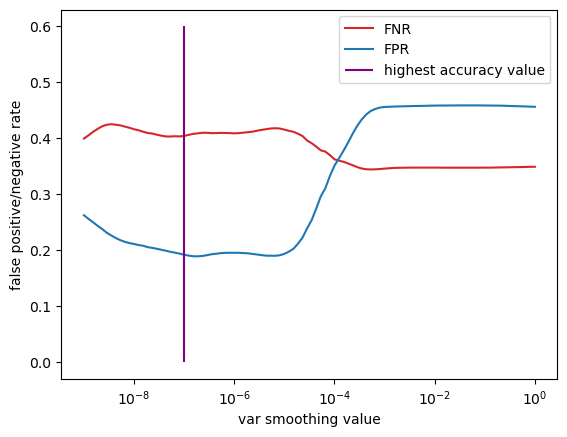

In [100]:
# Naive Bayes false positive/negative plot

# ax = plt.axes(xscale='log')
fig, ax = plt.subplots(1, 1)

ax.set_xscale('log')
ax.set_xlabel('var smoothing value')
ax.set_ylabel('false positive/negative rate')

ax.plot(var_smoothing_vals, nb_false_neg, label='FNR', color='tab:red')
ax.plot(var_smoothing_vals, nb_false_pos, label='FPR', color='tab:blue')

ax.vlines(x = var_smoothing_vals[bestVarSmoothing], ymin=0, ymax=0.6, colors='purple', label='highest accuracy value')

ax.legend()
plt.show()


In [101]:
# logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# X_log = df_normalized.drop(columns = ["cardio"])
# Y_log = df_normalized["cardio"]

# X_log_train , X_log_test , Y_log_train , Y_log_test = train_test_split(X_log,Y_log,test_size=0.2,random_state=0)
acc_log = 0
# best_C = float('-inf')
# C_vals = 10**np.arange(-8.,20.)
# for C in C_vals:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = max(acc_log, round(logreg.score(X_train, Y_train) * 100, 5))
# best_C = max(best_C, C)
print("Accureacy of Logistic Regression training set:" ,acc_log)

acc_test_log = round(logreg.score(X_log_test, Y_log_test) * 100, 5)
print("Accureacy of Logistic Regression validation set:" ,acc_test_log)


Accureacy of Logistic Regression training set: 72.77488
Accureacy of Logistic Regression validation set: 72.9289


In [102]:
# Correlation of Logisctic Regression
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
4,ap_lo,0.810374
6,gluc,0.504090
0,gender,0.357794
5,cholesterol,0.231042
3,ap_hi,0.197991
1,height,-0.001592
2,weight,-0.056563
7,smoke,-0.119634
8,alco,-0.159127
9,active,-0.213308


In [103]:
# ANN
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

def build_ann(optimizer='adam'):
    # Initializing the ANN
    ann = Sequential()
    
    # Adding the input layer and the first hidden layer of the ANN with dropout
    ann.add(Dense(units=32, kernel_initializer='glorot_uniform', activation='relu', input_shape=(len(X_ann_train.columns),)))
    
    # Add other layers, it is not necessary to pass the shape because there is a layer before
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    
    # Adding the output layer
    ann.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    
    # Compiling the ANN
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return ann

#train, test, target, target_test = train_test_split(df_normalized, df_nomalized["cardio"], test_size=0.2, random_state=0)

# X_ann = df_normalized.drop(columns = ["cardio"])
# Y_ann = df_normalized["cardio"]
# X_ann_train , X_ann_test , Y_ann_train , Y_ann_test = train_test_split(X_ann,Y_ann,test_size=0.2,random_state=0)

opt = optimizers.Adam(lr=0.001)
ann = build_ann(opt)
# Training the ANN
history = ann.fit(X_train, Y_train, batch_size=16, epochs=100, validation_data=(X_test, Y_test))

# Predicting the Train set results
ann_prediction = ann.predict(X_train)
ann_prediction = (ann_prediction > 0.5)*1 # convert probabilities to binary output

Epoch 1/100
3450/3450 [==============================] - 2s 449us/step - loss: 0.5725 - accuracy: 0.7197 - val_loss: 0.5544 - val_accuracy: 0.7275
Epoch 2/100
3450/3450 [==============================] - 1s 411us/step - loss: 0.5583 - accuracy: 0.7295 - val_loss: 0.5512 - val_accuracy: 0.7274
Epoch 3/100
3450/3450 [==============================] - 1s 412us/step - loss: 0.5556 - accuracy: 0.7314 - val_loss: 0.5507 - val_accuracy: 0.7278
Epoch 4/100
3450/3450 [==============================] - 1s 411us/step - loss: 0.5553 - accuracy: 0.7304 - val_loss: 0.5498 - val_accuracy: 0.7284
Epoch 5/100
3450/3450 [==============================] - 2s 437us/step - loss: 0.5521 - accuracy: 0.7331 - val_loss: 0.5491 - val_accuracy: 0.7265
Epoch 6/100
3450/3450 [==============================] - 1s 421us/step - loss: 0.5524 - accuracy: 0.7302 - val_loss: 0.5502 - val_accuracy: 0.7316
Epoch 7/100
3450/3450 [==============================] - 1s 426us/step - loss: 0.5516 - accuracy: 0.7324 - val_loss: 0

3450/3450 [==============================] - 1s 421us/step - loss: 0.5457 - accuracy: 0.7359 - val_loss: 0.5495 - val_accuracy: 0.7291
Epoch 57/100
3450/3450 [==============================] - 1s 412us/step - loss: 0.5461 - accuracy: 0.7345 - val_loss: 0.5490 - val_accuracy: 0.7304
Epoch 58/100
3450/3450 [==============================] - 1s 414us/step - loss: 0.5460 - accuracy: 0.7354 - val_loss: 0.5464 - val_accuracy: 0.7311
Epoch 59/100
3450/3450 [==============================] - 1s 416us/step - loss: 0.5460 - accuracy: 0.7352 - val_loss: 0.5469 - val_accuracy: 0.7300
Epoch 60/100
3450/3450 [==============================] - 1s 413us/step - loss: 0.5464 - accuracy: 0.7362 - val_loss: 0.5476 - val_accuracy: 0.7303
Epoch 61/100
3450/3450 [==============================] - 1s 412us/step - loss: 0.5463 - accuracy: 0.7345 - val_loss: 0.5490 - val_accuracy: 0.7304
Epoch 62/100
3450/3450 [==============================] - 1s 404us/step - loss: 0.5455 - accuracy: 0.7348 - val_loss: 0.5470 

In [104]:
# Training set results
ann_prediction = ann.predict(X_train)
ann_prediction = (ann_prediction > 0.5)*1 # convert probabilities to binary output

# Compute error between predicted data and true response and display it in confusion matrix
acc_ann = round(metrics.accuracy_score(Y_train, ann_prediction) * 100, 2)
print("Accureacy of ANN training set:", acc_ann)

1725/1725 [==============================] - 0s 214us/step
Accureacy of ANN training set: 73.7


In [105]:
# Predicting the Test set results
ann_prediction_test = ann.predict(X_test)
ann_prediction_test = (ann_prediction_test > 0.5)*1 # convert probabilities to binary output

# Compute error between predicted data and true response and display it in confusion matrix
acc_test_ann = round(metrics.accuracy_score(Y_test, ann_prediction_test) * 100, 5)
print("Accureacy of ANN validation set:",acc_test_ann)

432/432 [==============================] - 0s 238us/step
Accureacy of ANN validation set: 72.88541


In [127]:
# SVM with rbf
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
#train, test, target, target_test = train_test_split(df_normalized, df_nomalized["cardio"], test_size=0.2, random_state=0)

# X_svm = df_normalized.drop(columns = ["cardio"])
# Y_svm = df_normalized["cardio"]
# X_svm_train , X_svm_test , Y_svm_train , Y_svm_test = train_test_split(X_svm,Y_svm,test_size=0.2,random_state=0)

clf_rbf = svm.SVC(C = 2, kernel='rbf')
clf_rbf.fit(X_train, Y_train)
acc_svc = round(clf_rbf.score(X_train, Y_train) * 100, 5)
print("Accureacy of SVM with rbf training set:" ,acc_svc)

acc_test_svc = round(clf.score(X_test, Y_test) * 100, 5)
print("Accureacy of SVM with rbf validation set:" ,acc_test_svc)

Accureacy of SVM with rbf training set: 73.8367
Accureacy of SVM with rbf validation set: 73.13909


In [128]:
# SVM with poly
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
#train, test, target, target_test = train_test_split(df_normalized, df_nomalized["cardio"], test_size=0.2, random_state=0)

# X_svm = df_normalized.drop(columns = ["cardio"])
# Y_svm = df_normalized["cardio"]
# X_svm_train , X_svm_test , Y_svm_train , Y_svm_test = train_test_split(X_svm,Y_svm,test_size=0.2,random_state=0)

clf_poly = svm.SVC(C = 5, kernel='poly')
clf_poly.fit(X_train, Y_train)
acc_svc = round(clf_rbf.score(X_train, Y_train) * 100, 5)
print("Accureacy of SVM with poly training set:" ,acc_svc)

acc_test_svc = round(clf.score(X_test, Y_test) * 100, 5)
print("Accureacy of SVM with poly validation set:" ,acc_test_svc)

Accureacy of SVM with poly training set: 73.8367
Accureacy of SVM with poly validation set: 73.13909


In [129]:
svm_rbf_pre = clf_rbf.predict(X_test)
svm_poly_pre = clf_poly.predict(X_test)
log_pre = logreg.predict(X_test)

In [130]:
knn = KNeighborsClassifier(n_neighbors = neighbors[bestK])
knn.fit(knn_X_train, knn_Y_train)
knn_pre = knn.predict(knn_X_test)

In [142]:
nb_pre = nb[bestVarSmoothing].predict(X_test)

In [143]:
tree_pre = rf[bestTreeNum].predict(X_test)

In [135]:
ann_pre_before = ann.predict(X_test)
ann_pre_before = (ann_pre_before > 0.5)*1 # convert probabilities to binary output
ann_pre = []
for i in range(len(ann_pre_before)):
    ann_pre.append(ann_pre_before[i][0])
ann_pre = np.array(ann_pre)

432/432 [==============================] - 0s 272us/step


In [158]:
overall_pre = svm_rbf_pre+svm_poly_pre+log_pre+knn_pre+nb_pre+tree_pre+ann_pre
overall_pre = (overall_pre >= 4)*1

In [160]:
overall_acc = round(metrics.accuracy_score(Y_test, overall_pre) * 100, 5)
print(f"The accuracy if combine all 7 models: {overall_acc}")

The accuracy if combine all 7 models: 73.16083


In [166]:
from itertools import combinations

all_pre = [svm_rbf_pre,svm_poly_pre,log_pre,knn_pre,nb_pre,tree_pre,ann_pre]

acc_3_model = []
for i in combinations(all_pre, 3):
    comb_pre = i[0] + i[1] + i[2]
    comb_pre = (comb_pre >= 2)*1
    comb_acc = round(metrics.accuracy_score(Y_test, comb_pre) * 100, 5)
    acc_3_model.append(comb_acc)
acc_3_model.sort(reverse=True)
print(f"The accuracy of all different 3 combinations of models in non-increasing order are:\n{acc_3_model}")

The accuracy of all different 3 combinations of models in non-increasing order are:
[73.20432, 73.18258, 73.16083, 73.15358, 73.13184, 73.12459, 73.11734, 73.11734, 73.10285, 73.0811, 73.07386, 73.04486, 73.04486, 73.00863, 73.00863, 72.97239, 72.95789, 72.95064, 72.9289, 72.9289, 72.92165, 72.92165, 72.87091, 72.84917, 72.81293, 72.80568, 72.76944, 72.71871, 72.65348, 72.63898, 71.74023, 71.6895, 71.59527, 71.54454, 71.43582]


In [165]:
acc_5_model = []
for i in combinations(all_pre, 5):
    comb_pre = i[0] + i[1] + i[2] + i[3] + i[4]
    comb_pre = (comb_pre >= 2)*1
    comb_acc = round(metrics.accuracy_score(Y_test, comb_pre) * 100, 5)
    acc_5_model.append(comb_acc)

acc_5_model.sort(reverse=True)
print(f"The accuracy of all different 5 combinations of models in non-increasing order are:\n{acc_5_model}")

The accuracy of all different 5 combinations of models in non-increasing order are:
[73.15358, 73.06661, 73.03037, 73.00863, 72.97963, 72.97239, 72.68972, 72.60999, 72.55925, 72.50127, 72.47228, 71.55179, 71.53004, 71.45032, 71.43582, 71.39233, 71.3416, 71.30536, 71.24012, 71.21838, 71.21113]
